### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under `$20`), coffee houses, carry-out & take away, bar, and more expensive restaurants (`$20 - $50`).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
missing_data_percentage = (data.isnull().mean() * 100)
missing_data_percentage

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
df = data.drop('car', axis = 1)
df_dropped = df.dropna(axis=0, how='any')

4. What proportion of the total observations chose to accept the coupon?



In [18]:
acceptance_rate = df_dropped['Y'].value_counts(normalize=True) * 100
proportion_accepted = acceptance_rate.get(1, 0)

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Restaurant(<20)'),
  Text(4, 0, 'Restaurant(20-50)')])

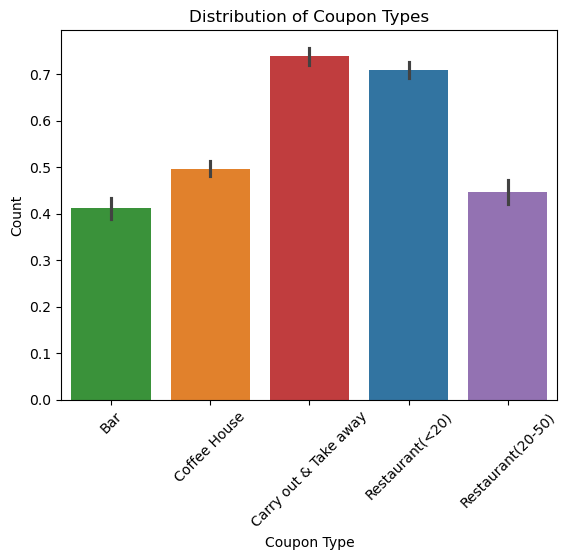

In [21]:
coupon_type_order = ['Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)']
sns.barplot(data=df_dropped, x='coupon', y='Y', hue='coupon', order=coupon_type_order)
plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Distribution of temperature')

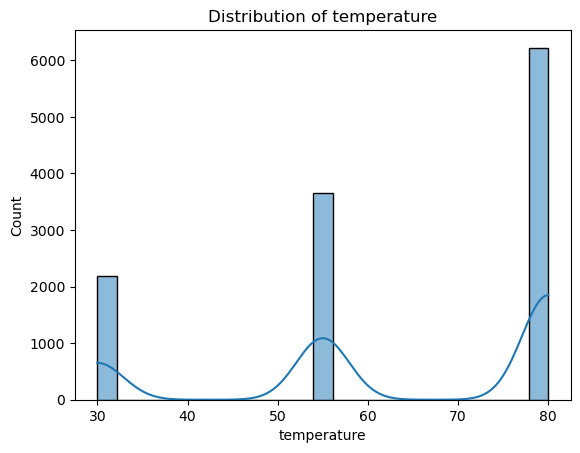

In [23]:
sns.histplot(data=df_dropped, x='temperature', kde=True)
plt.title("Distribution of temperature")

Text(0, 0.5, 'Count')

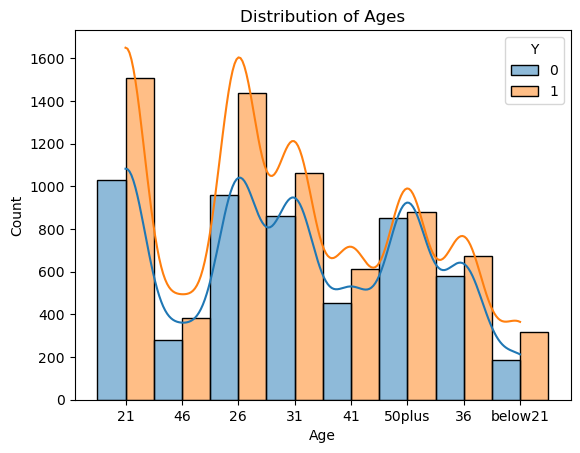

In [24]:
sns.histplot(data=df_dropped, x='age', hue='Y', kde=True, multiple='dodge')
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Count")

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Less than $12500'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$25000 - $37499'),
  Text(3, 0, '$37500 - $49999'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$62500 - $74999'),
  Text(6, 0, '$75000 - $87499'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, '$100000 or More')])

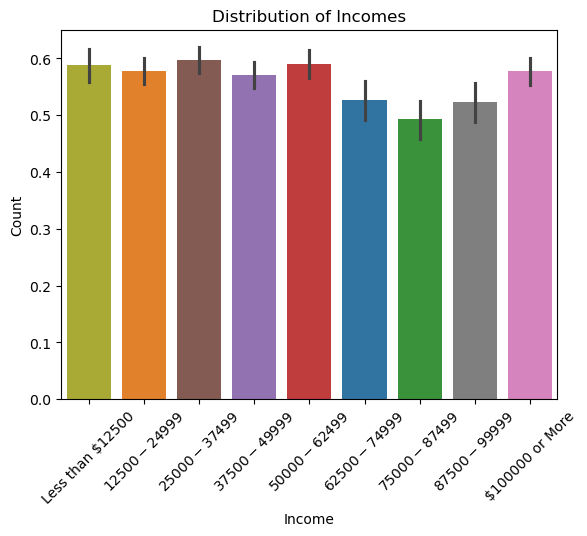

In [26]:
income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'] 
sns.barplot(data=df_dropped, x='income', y='Y', hue='income', order=income_order)
plt.title("Distribution of Incomes")
plt.xlabel("Income")
plt.ylabel("Count")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Married partner'),
  Text(2, 0, 'Unmarried partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

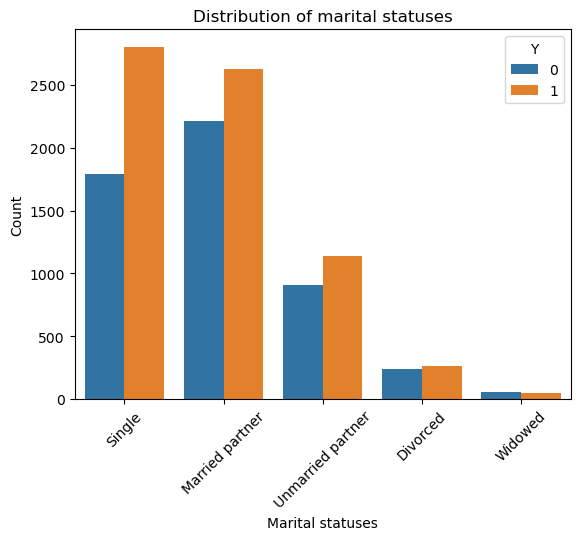

In [28]:
sns.countplot( data = df_dropped, x = 'maritalStatus', hue = 'Y')
plt.title("Distribution of marital statuses")
plt.xlabel("Marital statuses")
plt.ylabel("Count")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, '2PM'),
  Text(1, 0, '10AM'),
  Text(2, 0, '6PM'),
  Text(3, 0, '7AM'),
  Text(4, 0, '10PM')])

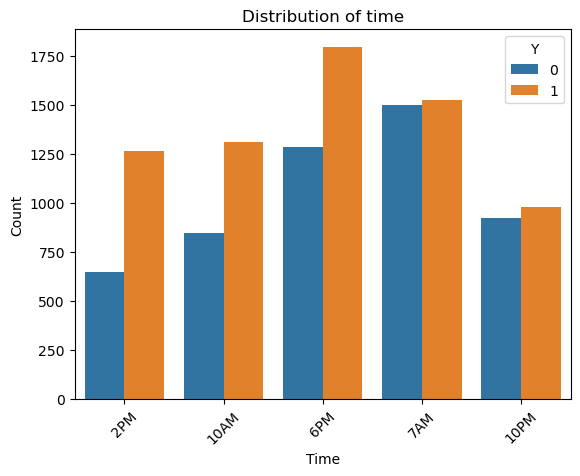

In [29]:
sns.countplot( data = df_dropped, x = 'time', hue = 'Y')
plt.title("Distribution of time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.xticks(rotation=45)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
df_bar_coupon = df_dropped.query('coupon == "Bar"').copy()

2. What proportion of bar coupons were accepted?


In [34]:
bar_coupon_acceptance_rate = df_bar_coupon['Y'].mean()
bar_coupon_acceptance_rate

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [38]:
df_bar_coupon['bar_visit_group'] = df_bar_coupon['Bar'].apply(
    lambda x: '3 or fewer' if x in ['never', 'less1', '1~3'] else 'More than 3' if x in ['4~8','gt8'] else 'Other')
acceptance_rate_by_bar_group = df_bar_coupon.groupby('bar_visit_group')['Y'].mean()
acceptance_rate_by_bar_group

bar_visit_group
3 or fewer     0.372674
More than 3    0.761658
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [43]:
df_bar_coupon = df_bar_coupon.copy()
df_bar_coupon.reset_index()
df_bar_coupon.loc[:,'goes_to_bar_more_than_once'] = df_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])
df_bar_coupon.loc[:,'age'] = pd.to_numeric(df_bar_coupon['age'], errors='coerce')
df_bar_coupon.loc[:,'baragegroup'] = df_bar_coupon.apply(
    lambda x: 'Goes to Bar More Than Once and Age > 25' if x['age'] > 25 and x['goes_to_bar_more_than_once']
              else 'All Others', axis=1)
acceptance_rate_by_bar_age_group = df_bar_coupon.groupby('baragegroup')['Y'].mean()
acceptance_rate_by_bar_age_group

baragegroup
All Others                                 0.350922
Goes to Bar More Than Once and Age > 25    0.694118
Name: Y, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [47]:
df_bar_coupon.reset_index()
df_bar_coupon.loc[:,'goes_to_bar_more_than_once'] = df_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])
df_bar_coupon.loc[:,'had_passanger_not_kid'] = df_bar_coupon['passanger'].isin(['Friend(s)','Partner'])
df_bar_coupon.loc[:,'occupation_not_farmingfishingforestry'] = ~df_bar_coupon['occupation'].isin(['Farming Fishing & Forestry'])
df_bar_coupon.loc[:,'barpassengeroccupationgroup'] = df_bar_coupon.apply(
    lambda x: 'Goes to Bar More Than Once and Have passages not a kid and occupations other than farming, fishing, or forestry' 
    if x['goes_to_bar_more_than_once'] and x['had_passanger_not_kid'] and x['occupation_not_farmingfishingforestry'] 
    else 'All Others', axis=1)
acceptance_rate_by_bar_passenger_occupation_group = df_bar_coupon.groupby('barpassengeroccupationgroup')['Y'].mean()
acceptance_rate_by_bar_passenger_occupation_group

barpassengeroccupationgroup
All Others                                                                                                         0.378770
Goes to Bar More Than Once and Have passages not a kid and occupations other than farming, fishing, or forestry    0.714286
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [50]:
condition1 = (
    (df_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (df_bar_coupon['passanger'].isin(['Friend(s)', 'Partner'])) & 
    (df_bar_coupon['maritalStatus'] != 'Widowed')
)
condition2 = (
    (df_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (df_bar_coupon['age'] < 30)
)
condition3 = (
    (df_bar_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (df_bar_coupon['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))
)
df_bar_coupon.loc[:,'group'] = 'All Others'
df_bar_coupon.loc[condition1, 'group'] = 'Condition 1: Bar, Not Kid, Not Widowed'
df_bar_coupon.loc[condition2, 'group'] = 'Condition 2: Bar, Under 30'
df_bar_coupon.loc[condition3, 'group'] = 'Condition 3: Restaurant, Income < 50K'
acceptance_rate_by_group = df_bar_coupon.groupby('group')['Y'].mean()
acceptance_rate_by_group

group
All Others                                0.333853
Condition 1: Bar, Not Kid, Not Widowed    0.642857
Condition 2: Bar, Under 30                0.714912
Condition 3: Restaurant, Income < 50K     0.456456
Name: Y, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [53]:
index_mapping = {
    'Condition 1: Bar, Not Kid, Not Widowed': 'Drivers who accepted the bar coupons are those who go to bars more than once a month, had passengers that were not a kid, and were not widowed.',
    'Condition 2: Bar, Under 30': 'Drivers who accepted the bar coupons are those who go to bars more than once a month and are under the age of 30.',
    'Condition 3: Restaurant, Income < 50K': 'Drivers who accepted the bar coupons are those who go to cheap restaurants more than 4 times a month and income is less than 50K.'
}
acceptance_rate_by_group = acceptance_rate_by_group.rename(index=index_mapping).idxmax()
acceptance_rate_by_group

'Drivers who accepted the bar coupons are those who go to bars more than once a month and are under the age of 30.'

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Coffee Coupons**

Follow the steps shown in the exmaple of exploration of just the bar related coupons.  
1. Create a new `DataFrame` that contains just the coffee coupons.

In [57]:
df_coffee_coupon = df_dropped.query('coupon == "Coffee House"').copy()
df_coffee_coupon

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of coffee house coupons were accepted?

In [60]:
coffee_coupon_acceptance_rate = df_coffee_coupon['Y'].mean()
coffee_coupon_acceptance_rate

0.49633123689727465

3. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

In [63]:
df_coffee_coupon['coffee_house_visit_group'] = df_coffee_coupon.apply(
    lambda x: 'went to a coffee house 3 or fewer times a month' if x['CoffeeHouse'] in ['never', 'less1', '1~3']  else "went more", axis=1
)
coffee_coupon_acceptance_rate_visit = df_coffee_coupon.groupby('coffee_house_visit_group')['Y'].mean()
coffee_coupon_acceptance_rate_visit

coffee_house_visit_group
went more                                          0.672556
went to a coffee house 3 or fewer times a month    0.445905
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [66]:
df_coffee_coupon.reset_index()
df_coffee_coupon['age'] = pd.to_numeric(df_coffee_coupon['age'], errors='coerce')
df_coffee_coupon['coffee_house_visit_age_group'] = df_coffee_coupon.apply(
    lambda x: 'Goes to Coffee House More Than Once and Age > 25' if x['age'] > 25 and x['CoffeeHouse'] in ['1~3', '4~8', 'gt8']
              else 'All Others', axis=1)
acceptance_rate_by_coffee_age_group = df_coffee_coupon.groupby('coffee_house_visit_age_group')['Y'].mean()
acceptance_rate_by_coffee_age_group

coffee_house_visit_age_group
All Others                                          0.441242
Goes to Coffee House More Than Once and Age > 25    0.630631
Name: Y, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to coffee houses more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [69]:
df_coffee_coupon.reset_index()
df_coffee_coupon['coffee_visit_passanger_occupation'] = df_coffee_coupon.apply(
    lambda x: "Go to coffee houses more than once a month, had passengers that were not a kid, had occupations other than farming, fishing, or forestry" if x['CoffeeHouse'] in ['1~3', '4~8', 'gt8'] and x['passanger'] in ['Friend(s)','Partner'] and x['occupation'] != 'Farming Fishing & Forestry'
    else "All others", axis=1
)
acceptance_rate_by_coffee_visit_passanger_occupation_group = df_coffee_coupon.groupby('coffee_visit_passanger_occupation')['Y'].mean()
acceptance_rate_by_coffee_visit_passanger_occupation_group

coffee_visit_passanger_occupation
All others                                                                                                                                  0.434908
Go to coffee houses more than once a month, had passengers that were not a kid, had occupations other than farming, fishing, or forestry    0.767376
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to coffee houses more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to coffee houses more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [72]:
df_coffee_coupon.reset_index()
coffeeCondition1 = (
    (df_coffee_coupon['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) &
    (df_coffee_coupon['passanger'].isin(['Friend(s)', 'Partner'])) & 
    (df_coffee_coupon['maritalStatus'] != 'Widowed')
)
coffeeCondition2 = (
    (df_coffee_coupon['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) &
    (df_coffee_coupon['age'] < 30)
)
coffeeCondition3 = (
    (df_coffee_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (df_coffee_coupon['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))
)
df_coffee_coupon['group_coffee'] = 'All others'
df_coffee_coupon.loc[coffeeCondition1, 'group_coffee'] = 'Condition 1'
df_coffee_coupon.loc[coffeeCondition2, 'group_coffee'] = 'Condition 2'
df_coffee_coupon.loc[coffeeCondition3, 'group_coffee'] = 'Condition 3'
acceprance_rate_conditionlist1 = df_coffee_coupon.groupby('group_coffee')['Y'].mean()
acceprance_rate_conditionlist1

group_coffee
All others     0.393309
Condition 1    0.768730
Condition 2    0.681507
Condition 3    0.546985
Name: Y, dtype: float64

7. Based on these observations, what do you hypothesize about drivers who accepted the coffee coupons?

In [75]:
index_mapping_coffee = {
    'Condition 1': 'Drivers who accepted the coffee coupons are those who go to coffee houses more than once a month, had passengers that were not a kid, and were not widowed.',
    'Condition 2': 'Drivers who accepted the coffee coupons are those who go to coffee houses more than once a month and are under the age of 30.',
    'Condition 3': 'Drivers who accepted the coffee coupons are those who go to cheap restaurants more than 4 times a month and income is less than 50K.'
}
acceprance_rate_conditionlist1_mapped_result = acceprance_rate_conditionlist1.rename(index=index_mapping_coffee).idxmax()
acceprance_rate_conditionlist1_mapped_result

'Drivers who accepted the coffee coupons are those who go to coffee houses more than once a month, had passengers that were not a kid, and were not widowed.'

### More Independent Investigations

Now explore the other 3 coupon groups.  

**Investigating less expensive restaurants (under $20) Coupons**

Combine the all the steps together.

In [79]:
df_Restaurant_20_coupon = df_dropped.query('coupon == "Restaurant(<20)"').copy()
restaurant_20_coupon_acceptance_rate = df_Restaurant_20_coupon['Y'].mean()
df_Restaurant_20_coupon['restaurant_20_visit_group'] = df_Restaurant_20_coupon.apply(
    lambda x: 'went to a restaurant less than 20 for 3 or fewer times a month' if x['RestaurantLessThan20'] in ['never', 'less1', '1~3']  else "went more", axis=1
)
restaurant_20_coupon_acceptance_rate_visit = df_Restaurant_20_coupon.groupby('restaurant_20_visit_group')['Y'].mean()
df_Restaurant_20_coupon.reset_index()
df_Restaurant_20_coupon['age'] = pd.to_numeric(df_Restaurant_20_coupon['age'], errors='coerce')
df_Restaurant_20_coupon['restaurant_20_age_visit_group'] = df_Restaurant_20_coupon.apply(
    lambda x: 'Goes to restaurant less than 20 More Than Once and Age > 25' if x['age'] > 25 and x['RestaurantLessThan20'] in ['1~3', '4~8', 'gt8']
              else 'All Others', axis=1)
acceptance_rate_by_restaurant_20_age_group = df_Restaurant_20_coupon.groupby('restaurant_20_age_visit_group')['Y'].mean()
df_Restaurant_20_coupon.reset_index()
restaurant_20Condition1 = (
    (df_Restaurant_20_coupon['RestaurantLessThan20'].isin(['1~3', '4~8', 'gt8'])) &
    (df_Restaurant_20_coupon['passanger'].isin(['Friend(s)', 'Partner'])) & 
    (df_Restaurant_20_coupon['maritalStatus'] != 'Widowed')
)
restaurant_20Condition2 = (
    (df_Restaurant_20_coupon['expiration'] == '1d') & 
    (df_Restaurant_20_coupon['time'].isin(['2PM', '6PM'])) 
)
restaurant_20Condition3 = (
    (df_Restaurant_20_coupon['expiration'].isin(['1d'])) & 
    (df_Restaurant_20_coupon['passanger'].isin(['Friend(s)']))
)
df_Restaurant_20_coupon['group_restaurant_20'] = 'All others'
df_Restaurant_20_coupon.loc[restaurant_20Condition1, 'group_restaurant_20'] = 'Condition 1'
df_Restaurant_20_coupon.loc[restaurant_20Condition2, 'group_restaurant_20'] = 'Condition 2'
df_Restaurant_20_coupon.loc[restaurant_20Condition3, 'group_restaurant_20'] = 'Condition 3'
acceprance_rate_conditionlist_restaurant_20_1 = df_Restaurant_20_coupon.groupby('group_restaurant_20')['Y'].mean()
index_mapping_Restaurant_20 = {
    'Condition 1': 'Drivers who accepted the restaurant less than 20 coupons are those who go to cheap restaurants more than once a month, had passengers that were not a kid, and were not widowed.',
    'Condition 2': 'Drivers who accepted the restaurant less than 20 coupons are those who took the coupon between 2PM and 6PM, and the expiration date is 1 day.',
    'Condition 3': 'Drivers who accepted the restaurant less than 20 coupons are those who had passengers that were not a kid and the expiration date is 1 day.'
}
acceprance_rate_conditionlist_restaurant_20_1_mapped_result = acceprance_rate_conditionlist_restaurant_20_1.rename(index=index_mapping_Restaurant_20).idxmax()
restaurant_20_coupon_acceptance_rate, restaurant_20_coupon_acceptance_rate_visit, acceptance_rate_by_restaurant_20_age_group, acceprance_rate_conditionlist_restaurant_20_1, acceprance_rate_conditionlist_restaurant_20_1_mapped_result

(0.7090086694308331,
 restaurant_20_visit_group
 went more                                                         0.730443
 went to a restaurant less than 20 for 3 or fewer times a month    0.694724
 Name: Y, dtype: float64,
 restaurant_20_age_visit_group
 All Others                                                     0.696924
 Goes to restaurant less than 20 More Than Once and Age > 25    0.721212
 Name: Y, dtype: float64,
 group_restaurant_20
 All others     0.592018
 Condition 1    0.745520
 Condition 2    0.880531
 Condition 3    0.917241
 Name: Y, dtype: float64,
 'Drivers who accepted the restaurant less than 20 coupons are those who had passengers that were not a kid and the expiration date is 1 day.')

**Investigating more expensive restaurants ($20 - 50) Coupons**

Combine the all the steps together.

In [82]:
df_Restaurant_2050_coupon = df_dropped.query('coupon == "Restaurant(20-50)"').copy()
restaurant_2050_coupon_acceptance_rate = df_Restaurant_2050_coupon['Y'].mean()
df_Restaurant_2050_coupon['restaurant_2050_visit_group'] = df_Restaurant_2050_coupon.apply(
    lambda x: 'went to a restaurant between 20 and 50 for 3 or fewer times a month' if x['Restaurant20To50'] in ['never', 'less1', '1~3']  else "went more", axis=1
)
restaurant_2050_coupon_acceptance_rate_visit = df_Restaurant_2050_coupon.groupby('restaurant_2050_visit_group')['Y'].mean()

df_Restaurant_2050_coupon.reset_index()
df_Restaurant_2050_coupon['age'] = pd.to_numeric(df_Restaurant_2050_coupon['age'], errors='coerce')
df_Restaurant_2050_coupon['restaurant_2050_age_visit_group'] = df_Restaurant_2050_coupon.apply(
    lambda x: 'Goes to restaurant between 20 and 50 More Than Once and Age > 25' if x['age'] > 25 and x['Restaurant20To50'] in ['1~3', '4~8', 'gt8']
              else 'All Others', axis=1)
acceptance_rate_by_restaurant_2050_age_group = df_Restaurant_2050_coupon.groupby('restaurant_2050_age_visit_group')['Y'].mean()

df_Restaurant_2050_coupon.reset_index()
restaurant_2050Condition1 = (
    (df_Restaurant_2050_coupon['Restaurant20To50'].isin(['1~3', '4~8', 'gt8'])) &
    (df_Restaurant_2050_coupon['passanger'].isin(['Friend(s)', 'Partner'])) & 
    (df_Restaurant_2050_coupon['maritalStatus'] != 'Widowed')
)
restaurant_2050Condition2 = (
    (df_Restaurant_2050_coupon['expiration'] == '1d') & 
    (df_Restaurant_2050_coupon['time'].isin(['2PM', '6PM'])) 
)
restaurant_2050Condition3 = (
    (df_Restaurant_2050_coupon['expiration'].isin(['1d'])) & 
    (df_Restaurant_2050_coupon['passanger'].isin(['Friend(s)']))
)
df_Restaurant_2050_coupon['group_restaurant_2050'] = 'All others'
df_Restaurant_2050_coupon.loc[restaurant_2050Condition1, 'group_restaurant_2050'] = 'Condition 1'
df_Restaurant_2050_coupon.loc[restaurant_2050Condition2, 'group_restaurant_2050'] = 'Condition 2'
df_Restaurant_2050_coupon.loc[restaurant_2050Condition3, 'group_restaurant_2050'] = 'Condition 3'
acceprance_rate_conditionlist_restaurant_2050_1 = df_Restaurant_2050_coupon.groupby('group_restaurant_2050')['Y'].mean()
index_mapping_Restaurant_2050 = {
    'Condition 1': 'Drivers who accepted the restaurant between 20 and 50 coupons are those who go to cheap restaurants more than once a month, had passengers that were not a kid, and were not widowed.',
    'Condition 2': 'Drivers who accepted the restaurant between 20 and 50 coupons are those who took the coupon between 2PM and 6PM, and the expiration date is 1 day.',
    'Condition 3': 'Drivers who accepted the restaurant between 20 and 50 coupons are those who had passengers that were friends and the expiration date is 1 day.'
}
acceprance_rate_conditionlist_restaurant_2050_1_mapped_result = acceprance_rate_conditionlist_restaurant_2050_1.rename(index=index_mapping_Restaurant_2050).idxmax()
restaurant_2050_coupon_acceptance_rate, restaurant_2050_coupon_acceptance_rate_visit,acceptance_rate_by_restaurant_2050_age_group,acceprance_rate_conditionlist_restaurant_2050_1, acceprance_rate_conditionlist_restaurant_2050_1_mapped_result

(0.44601270289343686,
 restaurant_2050_visit_group
 went more                                                              0.646552
 went to a restaurant between 20 and 50 for 3 or fewer times a month    0.428132
 Name: Y, dtype: float64,
 restaurant_2050_age_visit_group
 All Others                                                          0.410046
 Goes to restaurant between 20 and 50 More Than Once and Age > 25    0.568323
 Name: Y, dtype: float64,
 group_restaurant_2050
 All others     0.381607
 Condition 1    0.666667
 Condition 2    0.561605
 Condition 3    0.485714
 Name: Y, dtype: float64,
 'Drivers who accepted the restaurant between 20 and 50 coupons are those who go to cheap restaurants more than once a month, had passengers that were not a kid, and were not widowed.')

**Investigating Carry out & Take away Coupons**

Combine the all the steps together.

In [85]:
df_CarryAway_coupon = df_dropped.query('coupon == "Carry out & Take away"').copy()
CarryAway_coupon_acceptance_rate = df_CarryAway_coupon['Y'].mean()
df_CarryAway_coupon['CarryAway_visit_group'] = df_CarryAway_coupon.apply(
    lambda x: 'went to Carry out & Take away for 3 or fewer times a month' if x['CarryAway'] in ['never', 'less1', '1~3']  else "went more", axis=1
)
CarryAway_coupon_acceptance_rate_visit = df_CarryAway_coupon.groupby('CarryAway_visit_group')['Y'].mean()

df_CarryAway_coupon.reset_index()
df_CarryAway_coupon['age'] = pd.to_numeric(df_CarryAway_coupon['age'], errors='coerce')
df_CarryAway_coupon['CarryAway_age_visit_group'] = df_CarryAway_coupon.apply(
    lambda x: 'Goes to Carry out & Take away More Than Once and Age > 25' if x['age'] > 25 and x['CarryAway'] in ['1~3', '4~8', 'gt8']
              else 'All Others', axis=1)
acceptance_rate_by_CarryAway_age_group = df_CarryAway_coupon.groupby('CarryAway_age_visit_group')['Y'].mean()

df_CarryAway_coupon.reset_index()
CarryAwayCondition1 = (
    (df_CarryAway_coupon['CarryAway'].isin(['1~3', '4~8', 'gt8'])) &
    (df_CarryAway_coupon['passanger'].isin(['Friend(s)', 'Partner'])) & 
    (df_CarryAway_coupon['maritalStatus'] != 'Widowed')
)
CarryAwayCondition2 = (
    (df_CarryAway_coupon['expiration'] == '1d') & 
    (df_CarryAway_coupon['time'].isin(['2PM', '6PM'])) 
)
CarryAwayCondition3 = (
    (df_CarryAway_coupon['expiration'].isin(['1d'])) & 
    (df_CarryAway_coupon['direction_same'] == 1)
)
df_CarryAway_coupon['group_CarryAway'] = 'All others'
df_CarryAway_coupon.loc[CarryAwayCondition1, 'group_CarryAway'] = 'Condition 1'
df_CarryAway_coupon.loc[CarryAwayCondition2, 'group_CarryAway'] = 'Condition 2'
df_CarryAway_coupon.loc[CarryAwayCondition3, 'group_CarryAway'] = 'Condition 3'
acceprance_rate_conditionlist_CarryAway_1 = df_CarryAway_coupon.groupby('group_CarryAway')['Y'].mean()
index_mapping_CarryAway = {
    'Condition 1': 'Drivers who accepted the Carry out & Take away coupons are those who go to cheap restaurants more than once a month, had passengers that were not a kid, and were not widowed.',
    'Condition 2': 'Drivers who accepted the Carry out & Take away coupons are those who took the coupon between 2PM and 6PM, and the expiration date is 1 day.',
    'Condition 3': 'Drivers who accepted the Carry out & Take away coupons are those who drove the same direction and the expiration date is 1 day.'
}
acceprance_rate_conditionlist_CarryAway_1_mapped_result = acceprance_rate_conditionlist_CarryAway_1.rename(index=index_mapping_CarryAway).idxmax()
CarryAway_coupon_acceptance_rate, CarryAway_coupon_acceptance_rate_visit,acceptance_rate_by_CarryAway_age_group,acceprance_rate_conditionlist_CarryAway_1, acceprance_rate_conditionlist_CarryAway_1_mapped_result

(0.737719298245614,
 CarryAway_visit_group
 went more                                                     0.753475
 went to Carry out & Take away for 3 or fewer times a month    0.723564
 Name: Y, dtype: float64,
 CarryAway_age_visit_group
 All Others                                                   0.734062
 Goes to Carry out & Take away More Than Once and Age > 25    0.741117
 Name: Y, dtype: float64,
 group_CarryAway
 All others     0.692864
 Condition 1    0.723992
 Condition 2    0.860274
 Condition 3    0.771513
 Name: Y, dtype: float64,
 'Drivers who accepted the Carry out & Take away coupons are those who took the coupon between 2PM and 6PM, and the expiration date is 1 day.')

# Coupon Acceptance Report
## Overview
This report highlights the key differences between drivers who accepted various types of coupons and those who did not. The goal is to identify patterns in customer behavior based on their preferences, habits, and demographic factors. This analysis will help refine marketing strategies for future coupon offers.
## Link to the Jupyter notebook
[My Jupyter notebook](https://github.com/jeffhonghou/coupon_acceptance_analysis/blob/main/prompt.ipynb)
## Key Findings
**1. Bar Coupons**
- Accepted by: Drivers who go to bars more than once a month and are under the age of 30.
- Non-acceptance: Drivers who visit bars less frequently or are older than 30 tend to disregard bar coupons.
  
**2. Coffee Coupons**
- Accepted by: Drivers who visit coffee houses more than once a month, have passengers who are not kids, and are not widowed.
- Non-acceptance: Drivers who have children as passengers or are widowed showed less interest in accepting coffee coupons.
  
**3. Less Expensive Restaurants (under `$20`) Coupons**
- Accepted by: Drivers who had passengers that were not kids and when the coupon’s expiration date was within 1 day.
- Non-acceptance: Drivers with children as passengers or when the coupon had more than a 1-day expiration window.
  
**4. More Expensive Restaurants (`$20 - $50`) Coupons**
- Accepted by: Drivers who visit cheap restaurants more than once a month, have passengers who are not kids, and are not widowed.
- Non-acceptance: Drivers who do not visit inexpensive restaurants frequently or are widowed were less likely to accept these coupons.
  
**5. Carry Out & Takeaway Coupons**
- Accepted by: Drivers who took the coupon between 2 PM and 6 PM, and when the expiration date was within 1 day.
- Non-acceptance: Drivers who either didn’t take the coupon during this time frame or had a longer expiration window tended to ignore these offers.
## Actionable Items and Recommendations
**1. Target Young Drivers for Bar Coupons**
- **Recommendation:** Focus marketing efforts on drivers under 30 who visit bars more than once a month. Tailor bar-related offers towards this demographic and frequency pattern to increase coupon acceptance.

**2. Offer Coffee Coupons to Drivers without kids with them**
- **Recommendation:** Coffee coupons should be aimed at drivers who frequent coffee houses, have passengers who are not children, and are not widowed. Adjust campaigns to reflect these behavioral trends.

**3. Long Expiry Coupons for Restaurant Offers**
- **Recommendation:** For less expensive restaurant coupons, offer coupons with a 1-day instead of 1-hour expiration window to increase uptake. Specifically target drivers without children as passengers.

**4. Target Regular Restaurant Goers for Expensive Coupons**
- **Recommendation:** Aim promotions for more expensive restaurant coupons at drivers who visit inexpensive restaurants frequently and are not widowed. This specific customer base is more likely to respond positively to these offers.

**5. Time-Limited Carry-Out Coupons**
- **Recommendation:** For takeaway coupons, consider offering time-sensitive coupons between 2 PM and 6 PM with 1-day expiration. This time window showed the highest coupon acceptance rate.

## Conclusion
The coupon acceptance data shows clear patterns based on customers' frequency of visits to certain types of establishments, their demographics, and the timing of the offer. Customers who engage with specific venues regularly (like bars or coffee houses) or who have certain passenger types (e.g., no children) are more likely to accept relevant coupons.